<a href="https://colab.research.google.com/github/bedadiggelmann/bina/blob/main/3_3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **3.3.3 Zukunftszenario Wohnraum**

Der Kanton St. Gallen stellt statistisch berechnete Zukunftszahlen zur Verfügung, wie gross die Bevölkerung in den Jahren 2025, 2030, 2035 usw. sein wird. Auf Basis dieser Daten möchte die Projektgruppe aufzeigen, wie der Wohnraumbedarf in den kommenden Jahren aussehen und wie sich das Wohnraumwachstum entsprechend entwickeln müsste.

Dargestellt wird das berechnete durchschnittliche Wachstum des Wohnraums als lineare Regression und die Anzahl Haushalte als Balken. Die Anzahl Haushalte für die Zukunft wird anhand der statistischen Zahl "Durchschnittliche Personen pro Haushalt" für die Zukunft berechnet. Da der Wert in den letzten 3 Jahren stabil war, wird dieser auch auf die Zukunft übertragen. Mögliche Abweichungen aufgrund von Veränderungen im Verhalten der Einwohner sind vorbehalten.

Die Grafik wird pro Wahlkreis erstellt, da nur Wahlkreis- und keine Gemeindeprognosen zur Verfügung stehen. Somit ist ein städtisch/ländlicher Vergleich nicht möglich.


**1. Laden und Vorbereiten der Bevölkerungsdaten**

In diesem Schritt werden die CSV-Dateien mit den Daten zur ständigen Wohnbevölkerung, den Bevölkerungstrends und der Anzahl Personen pro Haushalt geladen. Die Spalten in den DataFrames werden umbenannt, um Klarheit zu schaffen. Zudem werden die Namen der Wahlkreise standardisiert, indem unnötige Präfixe entfernt und Schreibweisen vereinheitlicht werden. Dies sorgt für eine konsistente Benennung in allen Datensätzen und erleichtert die spätere Analyse.

In [ ]:
# Load data
population_trend_df = load_data('data/ständige_wohnbevoelkerung_wahlkreise_trend_kt_stgallen.csv', delimiter=';')
personen_pro_haushalt_df = load_data('data/anzahl_personen_pro_haushalt_wahlkreise.csv', delimiter=';')

# Rename columns for clarity
population_trend_df.rename(columns={'GEBIET_NAME': 'Wahlkreis', 'INDIKATOR_JAHR': 'Jahr', 'INDIKATOR_VALUE': 'Bevölkerungsgrösse'}, inplace=True)
personen_pro_haushalt_df.rename(columns={'GEBIET_NAME': 'Wahlkreis', 'INDIKATOR_JAHR': 'Jahr', 'INDIKATOR_VALUE': 'Anzahl Personen pro Haushalt'}, inplace=True)

# Standardize the name "St. Gallen" in DataFrames
population_trend_df['Wahlkreis'] = population_trend_df['Wahlkreis'].str.replace('Wahlkreis ', '').str.replace('St.Gallen', 'St. Gallen').str.strip()
personen_pro_haushalt_df['Wahlkreis'] = personen_pro_haushalt_df['Wahlkreis'].str.replace('Wahlkreis ', '').str.replace('St.Gallen', 'St. Gallen').str.strip()


**2. Erstellen und Speichern der Bevölkerungs- und Haushaltsdaten**

In diesem Schritt werden separate Tabellen für die Bevölkerungsgrösse und die Anzahl Personen pro Haushalt erstellt. Die Tabelle zur Bevölkerungsgrösse wird sowohl für aktuelle als auch für Trenddaten erstellt. Danach wird für jeden Wahlkreis der neueste Wert der Anzahl Personen pro Haushalt ermittelt und in eine neue CSV-Datei gespeichert. Zusätzlich wird das Bevölkerungswachstum als prozentuale Veränderung der Bevölkerungsgrösse berechnet. Schliesslich werden die Tabellen zur Bevölkerungsgrösse und zum Bevölkerungswachstum in neuen CSV-Dateien gespeichert.

In [ ]:
# Create a table with Wahlkreis, Jahr, and Bevölkerungsgrösse
population_trend_table = population_trend_df[['Wahlkreis', 'Jahr', 'Bevölkerungsgrösse']].copy()

# Create a table with Wahlkreis, Jahr, and Anzahl Personen pro Haushalt
personen_pro_haushalt_table = personen_pro_haushalt_df[['Wahlkreis', 'Jahr', 'Anzahl Personen pro Haushalt']]

# Get the most recent "Personen pro Haushalt" value per Wahlkreis
personen_pro_haushalt_latest = personen_pro_haushalt_table.groupby('Wahlkreis').apply(lambda x: x.loc[x['Jahr'].idxmax()]).reset_index(drop=True)

# Save the most recent "Personen pro Haushalt" data to a new CSV file
output_file_path_personen_pro_haushalt = 'output_data/anzahl_personen_pro_haushalt_pro_wahlkreis_latest.csv'
personen_pro_haushalt_latest.to_csv(output_file_path_personen_pro_haushalt, index=False)

# Calculate population growth
population_trend_table['Bevölkerungswachstum'] = population_trend_table.groupby('Wahlkreis')['Bevölkerungsgrösse'].pct_change() * 100

# Ensure the order of values matches in both dataframes
population_trend_table.sort_values(by=['Wahlkreis', 'Jahr'], inplace=True)

# Merge dataframes
population_trend_table['Jahr'] = population_trend_table['Jahr'].astype(int)

# Save the population_trend_table to a new CSV file
output_file_path = 'output_data/anzahl_staendige_wohnbevoelkerung_trend_pro_wahlkreis.csv'
population_trend_table.to_csv(output_file_path, index=False)

**3. Laden der Datensätze für Wohnungen, Haushalte und Bevölkerung**

In diesem Schritt werden die verschiedenen Datensätze geladen, die Informationen über die Anzahl der Wohnungen, Haushalte, Leerwohnungen und die Bevölkerungsgrösse in den Wahlkreisen enthalten. Dazu gehören aktuelle und trendbasierte Daten sowie die Anzahl der Personen pro Haushalt.

In [ ]:
# Load the datasets
wohnungen_df = load_data('output_data/anzahl_wohnungen_pro_wahlkreis.csv', delimiter=',')
haushalte_df = load_data('output_data/anzahl_haushalte_pro_wahlkreis.csv', delimiter=',')
bevölkerung_trend_df = load_data('output_data/anzahl_staendige_wohnbevoelkerung_trend_pro_wahlkreis.csv', encoding="utf-8", delimiter=',')
anzahl_personen_pro_haushalt_latest = load_data('output_data/anzahl_personen_pro_haushalt_pro_wahlkreis_latest.csv', delimiter=',')
leerwohnungen_df = load_data('output_data/anzahl_leerwohnungen_pro_wahlkreis.csv', delimiter=',')

**4. Berechnen der zukünftigen Anzahl Haushalte**

In diesem Abschnitt werden die trendbasierten Bevölkerungsdaten mit den neuesten Daten zur Anzahl der Personen pro Haushalt zusammengeführt. Anschliessend wird die zukünftige Anzahl an Haushalten berechnet, indem die Bevölkerungsgrösse durch die durchschnittliche Personenanzahl pro Haushalt geteilt wird.

In [ ]:
# Melt the leerwohnungen_df to have 'Jahr' and 'Anzahl Leerwohnungen' columns
leerwohnungen_df_melted = leerwohnungen_df.melt(id_vars=["Wahlkreis"], var_name="Jahr", value_name="Anzahl Leerwohnungen")
leerwohnungen_df_melted["Jahr"] = leerwohnungen_df_melted["Jahr"].astype(int)

# Merge the trend population data with the most recent "Personen pro Wohnung" data
bevölkerung_trend_merged = pd.merge(bevölkerung_trend_df, anzahl_personen_pro_haushalt_latest[['Wahlkreis', 'Anzahl Personen pro Haushalt']], on='Wahlkreis')

# Calculate future households
bevölkerung_trend_merged['Anzahl Haushalte'] = bevölkerung_trend_merged['Bevölkerungsgrösse'] / bevölkerung_trend_merged['Anzahl Personen pro Haushalt']

**5. Lineare Regression und Vorhersage des Wohnraumbedarfs**

In diesem Abschnitt wird die lineare Regression genutzt, um zukünftige Wohnraumbedarfe für jeden Wahlkreis vorherzusagen. Der Prozess umfasst mehrere Schritte:

Zunächst wird eine Hilfsfunktion definiert, die die lineare Regression durchführt und zukünftige Vorhersagen berechnet. Hierbei werden die Jahre von 2025 bis 2050 in 5-Jahres-Schritten berücksichtigt.

Dann werden die Datensätze für Wohnungen für jeden Wahlkreis separat verarbeitet. Die historischen Daten für die Anzahl der Wohnungen werden mittels linearer Regression analysiert, um zukünftige Entwicklungen vorherzusagen.

Die Anzahl der Privathaushalte und die Anzahl der Leerwohnungen werden für jedes Jahr summiert. Eine lineare Regression wird dann auf die kombinierten Daten angewendet, um die Gesamtzahl der Haushalte und Leerwohnungen in der Zukunft vorherzusagen.

Die Ergebnisse dieser Berechnungen werden in zwei Datenstrukturen gespeichert: `future_predictions_dict` für die Vorhersagen und `regression_models` für die Regressionsmodelle. Diese Vorhersagen und Modelle werden verwendet, um zukünftige Wohnraumbedarfe für jeden Wahlkreis darzustellen.

Durch diese systematische Analyse und Vorhersage können wir einen umfassenden Überblick über die zukünftige Entwicklung des Wohnraumbedarfs in den verschiedenen Wahlkreisen erhalten.

In [ ]:
# Helper function to perform linear regression and make predictions
def linear_regression(df, x_col, y_col, future_years):
    X = df[x_col].values
    y = df[y_col].values
    slope, intercept = np.polyfit(X, y, 1)
    future_predictions = intercept + slope * future_years
    return future_predictions, slope, intercept

# Prepare future years for prediction
future_years = np.array([2025, 2030, 2035, 2040, 2045, 2050])

# Store the predictions and regression models
future_predictions_dict = {}
regression_models = {}

# Perform linear regression for each Wahlkreis and each dataset
for wahlkreis in wohnungen_df['Wahlkreis'].unique():
    # Lineare Regression für Anzahl Wohnungen
    wohnungen_data = wohnungen_df[wohnungen_df['Wahlkreis'] == wahlkreis].copy()
    wohnungen_data = wohnungen_data.melt(id_vars=["Wahlkreis"], var_name="Jahr", value_name="Anzahl Wohnungen")
    wohnungen_data["Jahr"] = wohnungen_data["Jahr"].astype(int)
    wohnungen_predictions, wohnungen_slope, wohnungen_intercept = linear_regression(wohnungen_data, 'Jahr', 'Anzahl Wohnungen', future_years)

    # Create combined effective Data for
    haushalte_data = haushalte_df[haushalte_df['Wahlkreis'] == wahlkreis]
    leerwohnungen_data = leerwohnungen_df_melted[leerwohnungen_df_melted['Wahlkreis'] == wahlkreis]
    combined_effective_data = pd.merge(
        haushalte_data,
        leerwohnungen_data,
        on=["Wahlkreis", "Jahr"],
        suffixes=("_haushalte", "_leerwohnungen")
    )
    combined_effective_data["Total Leerwohnungen und Haushalte"] = combined_effective_data["Anzahl Privathaushalte"] + combined_effective_data["Anzahl Leerwohnungen"]

    # Lineare Regression auf kombinierte Daten
    total_predictions, total_slope, total_intercept = linear_regression(combined_effective_data, 'Jahr', 'Total Leerwohnungen und Haushalte', future_years)

    # Speichern der Vorhersagen
    future_predictions_dict[wahlkreis] = {
        'wohnungen': wohnungen_predictions,
        'total': total_predictions
    }

    # Speichern der Regressionsmodelle
    regression_models[wahlkreis] = {
        'wohnungen': (wohnungen_slope, wohnungen_intercept),
        'total': (total_slope, total_intercept)
    }


**6. Visualisierung des Wohnraumbedarfs**

In diesem letzten Abschnitt des Skripts werden die zukünftigen Wohnraumbedarfe für jeden Wahlkreis visualisiert. Zunächst werden die Daten für Wohnungen, Haushalte und Leerwohnungen für jeden Wahlkreis vorbereitet. Für jeden Wahlkreis wird eine Vorhersage der zukünftigen Entwicklungen bis 2055 auf Basis der zuvor berechneten Regressionsmodelle erstellt.

Die Visualisierungen zeigen die lineare Regression für die Anzahl der Wohnungen und die Gesamtzahl der Haushalte und Leerwohnungen. Die Balkendiagramme stellen die tatsächlichen und prognostizierten Daten für die Anzahl der Haushalte dar, während Linien die Vorhersagen für die Wohnungen und die kombinierte Anzahl von Leerwohnungen und Haushalten darstellen.

Die Diagramme werden individuell angepasst, um eine klare Darstellung zu gewährleisten. Jedes Diagramm wird beschriftet und mit einer Legende versehen, um die Interpretation der Daten zu erleichtern. Die resultierenden Grafiken bieten einen visuellen Überblick über die erwarteten Trends und Entwicklungen im Wohnraumbedarf der verschiedenen Wahlkreise.

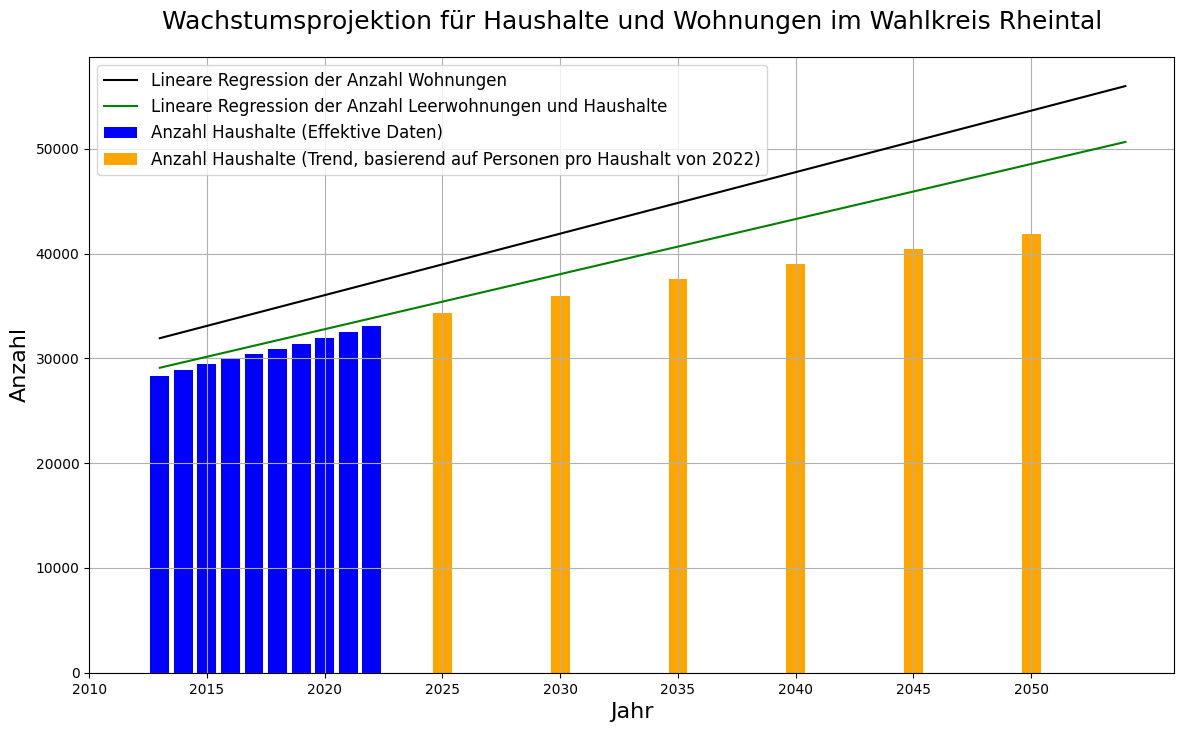

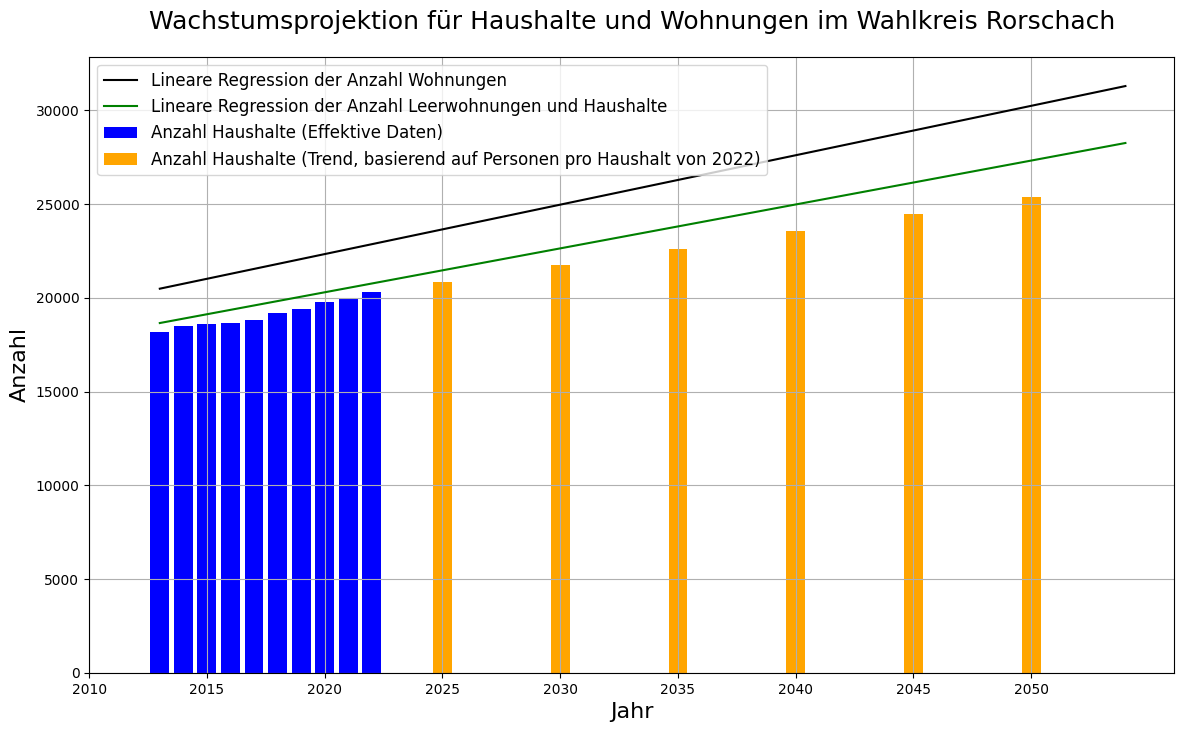

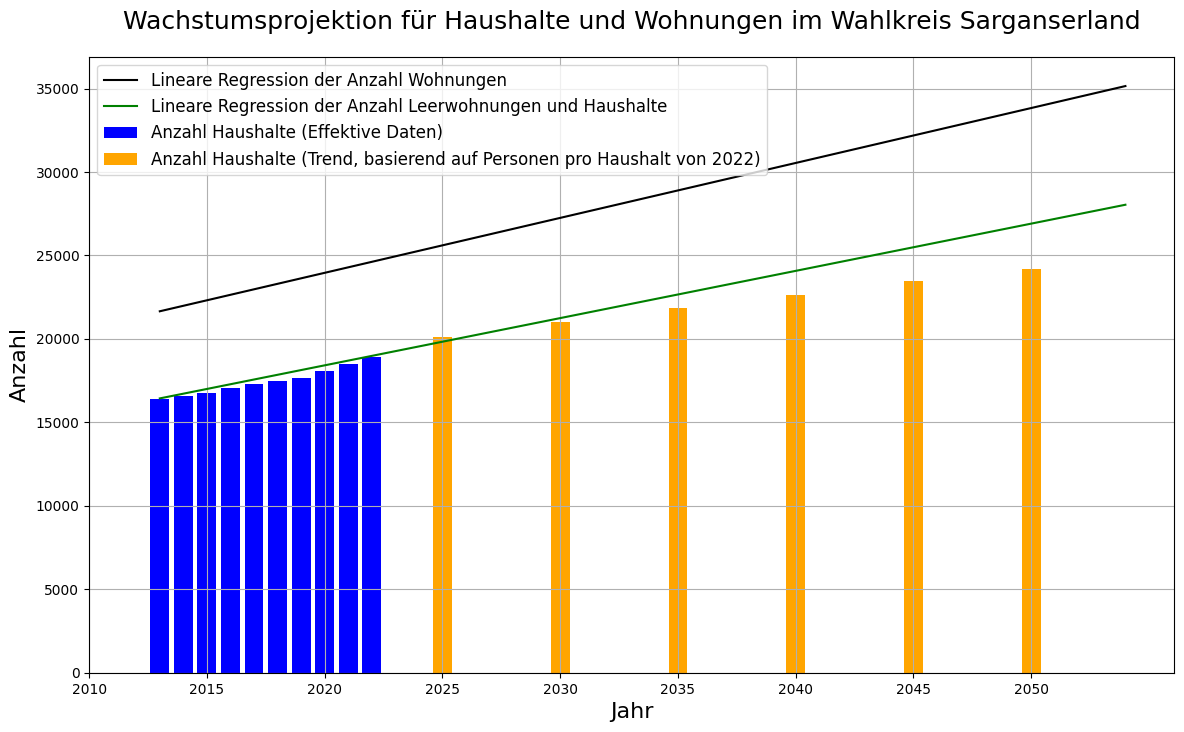

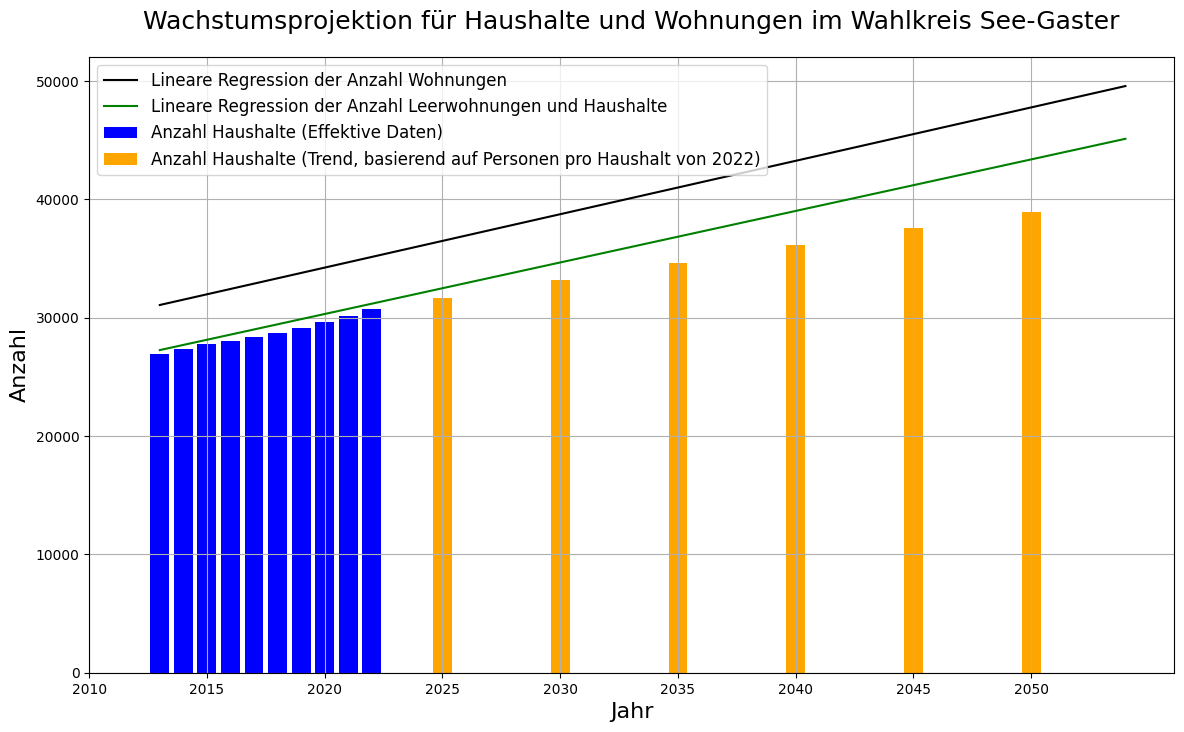

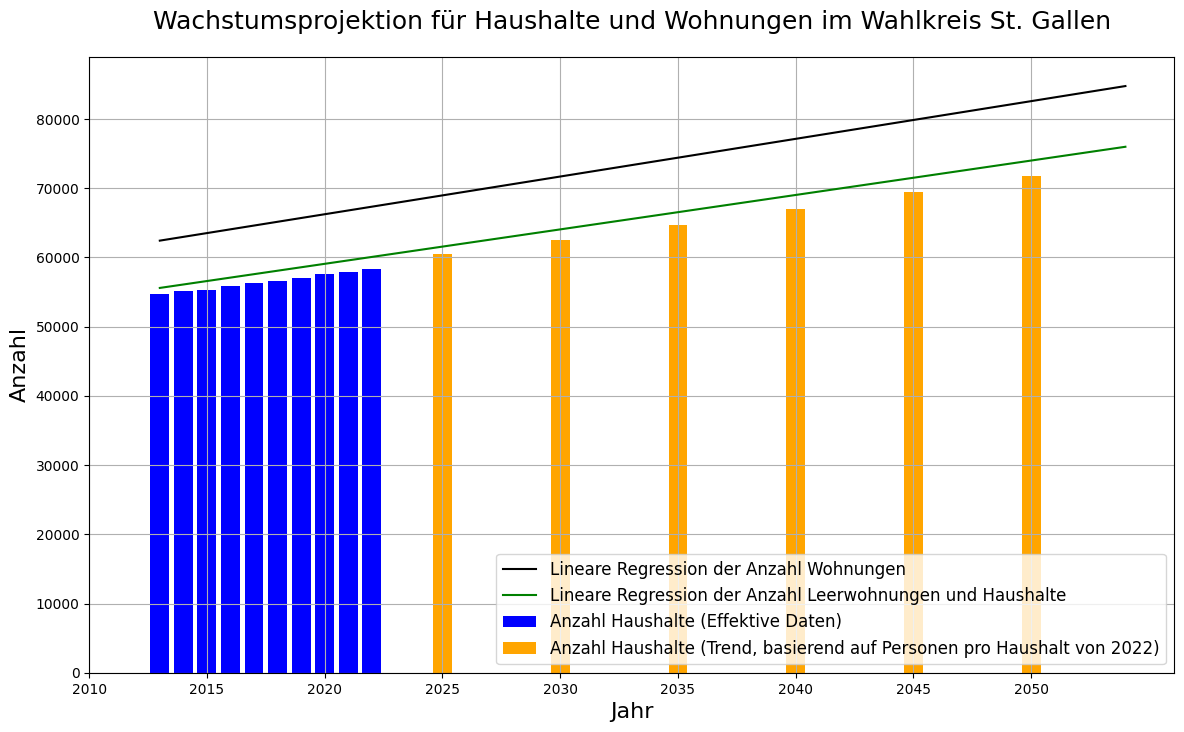

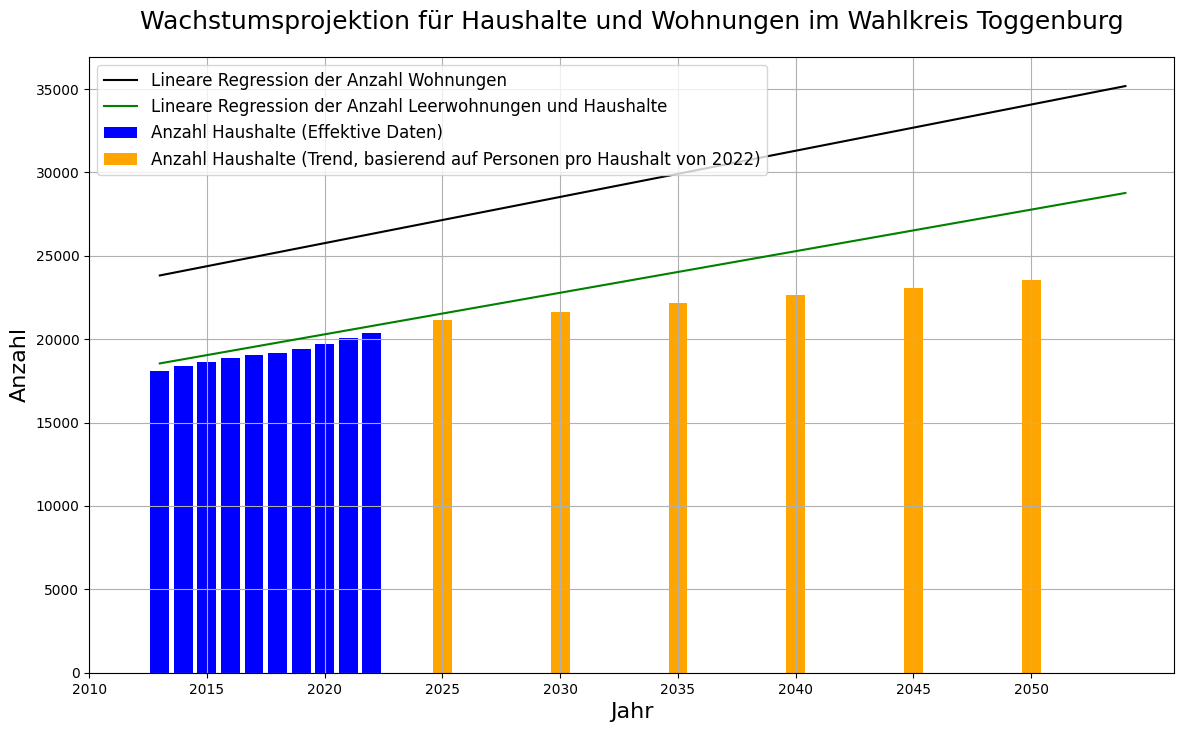

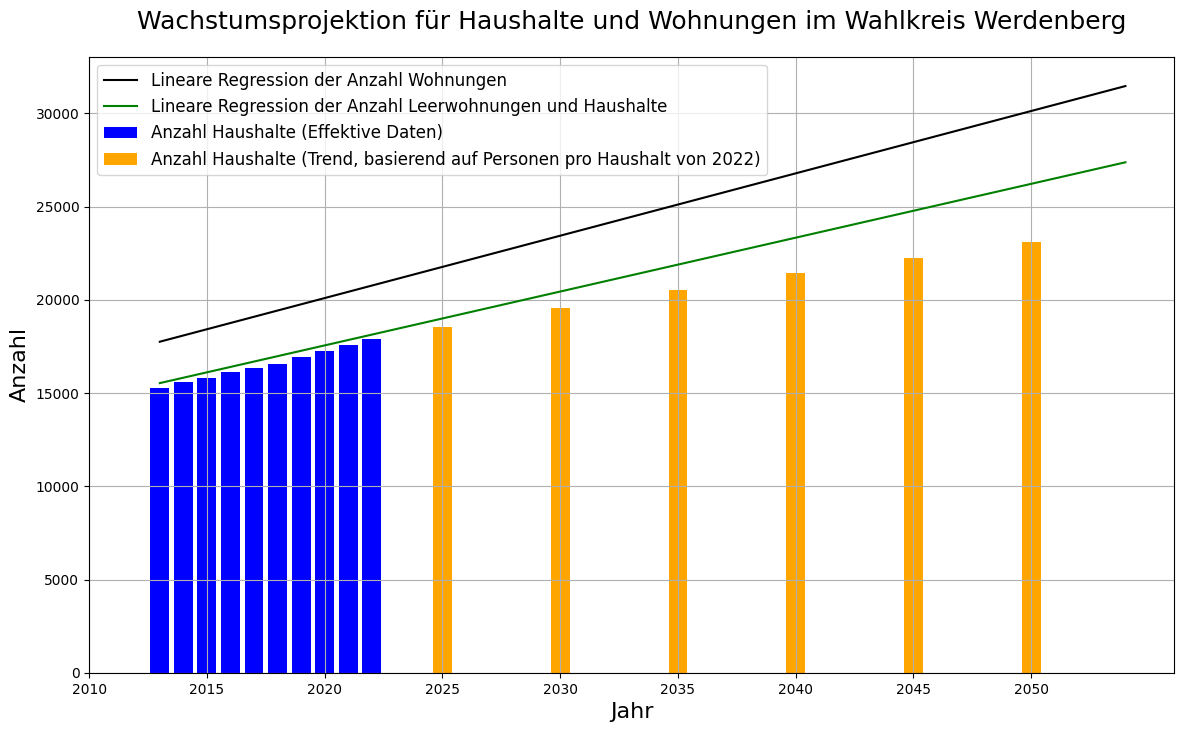

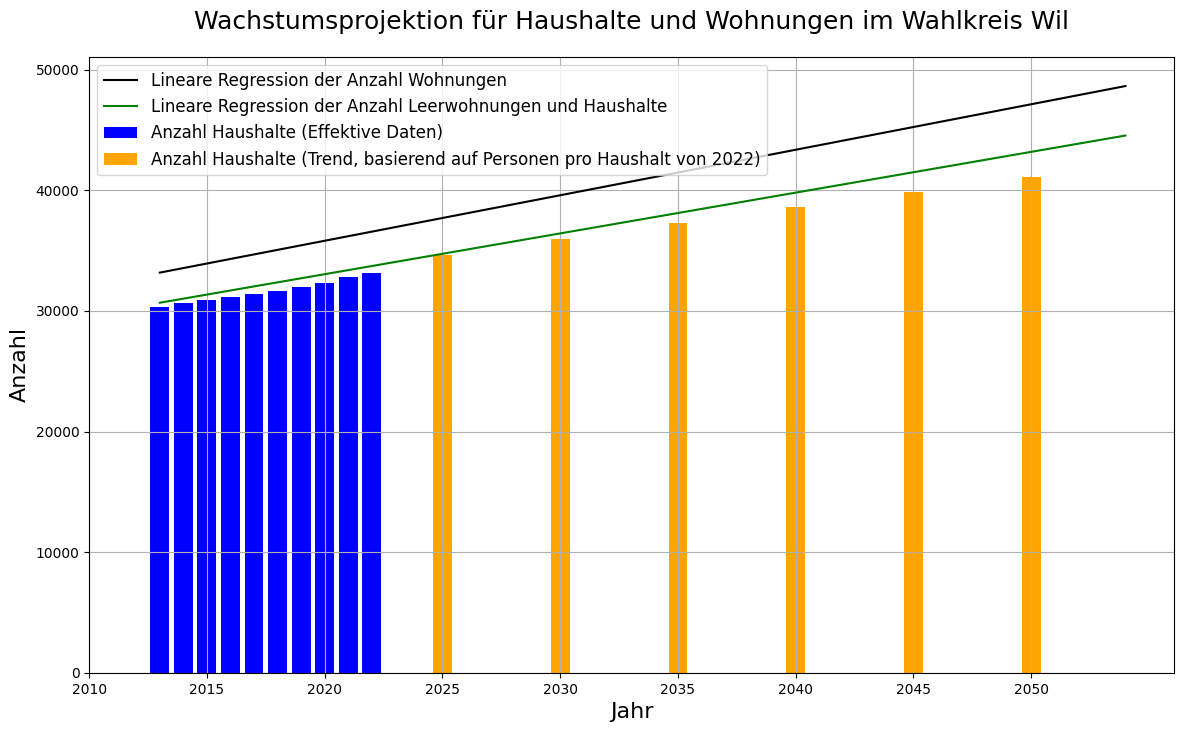

In [ ]:
# Plotting
for wahlkreis, predictions in future_predictions_dict.items():
    wohnungen_data = wohnungen_df[wohnungen_df['Wahlkreis'] == wahlkreis].copy()
    wohnungen_data = wohnungen_data.melt(id_vars=["Wahlkreis"], var_name="Jahr", value_name="Anzahl Wohnungen")
    wohnungen_data["Jahr"] = wohnungen_data["Jahr"].astype(int)
    haushalte_data = haushalte_df[haushalte_df['Wahlkreis'] == wahlkreis]
    leerwohnungen_data = leerwohnungen_df_melted[leerwohnungen_df_melted['Wahlkreis'] == wahlkreis]
    bevölkerung_trend_data = bevölkerung_trend_merged[bevölkerung_trend_merged['Wahlkreis'] == wahlkreis]

    # Generate full range for prediction
    full_years = np.arange(haushalte_data['Jahr'].min(), 2055)
    wohnungen_full_predictions = regression_models[wahlkreis]['wohnungen'][1] + regression_models[wahlkreis]['wohnungen'][0] * full_years
    total_full_predictions = regression_models[wahlkreis]['total'][1] + regression_models[wahlkreis]['total'][0] * full_years

    plt.figure(figsize=(14, 8))

    # Plot the linear regression line for number of apartments
    plt.plot(full_years, wohnungen_full_predictions, label='Lineare Regression der Anzahl Wohnungen', color='black')

    # Plot the bars for number of households (actual data and trend data)
    plt.bar(haushalte_data['Jahr'], haushalte_data['Anzahl Privathaushalte'], label='Anzahl Haushalte (Effektive Daten)', color='blue')
    plt.bar(bevölkerung_trend_data['Jahr'], bevölkerung_trend_data['Anzahl Haushalte'], label='Anzahl Haushalte (Trend, basierend auf Personen pro Haushalt von 2022)', color='orange')

    # Plot the linear regression line for the combined data
    plt.plot(full_years, total_full_predictions, label='Lineare Regression der Anzahl Leerwohnungen und Haushalte', color='green')

    # Customize the plot
    plt.title(f'Wachstumsprojektion für Haushalte und Wohnungen im Wahlkreis {wahlkreis}', fontsize=18, pad=20)
    plt.xlabel('Jahr', fontsize=16)
    plt.ylabel('Anzahl', fontsize=16)
    plt.xticks(np.arange(2010, 2051, 5))  # Set the x-ticks to every 5 years
    plt.legend(fontsize=12)
    plt.grid(True)

    # Show the plot
    plt.show()